# generate sin wave + white noise

参考文献
- [Pythonで行う音楽ファイルのノイズ除去と可視化]https://qiita.com/RyutoYoda/items/435787141cac5dd9eed7
- [Pythonでのフーリエ変換(FFT)の方法と注意点]https://qiita.com/chnokrn/items/57c89382942778a20e7f


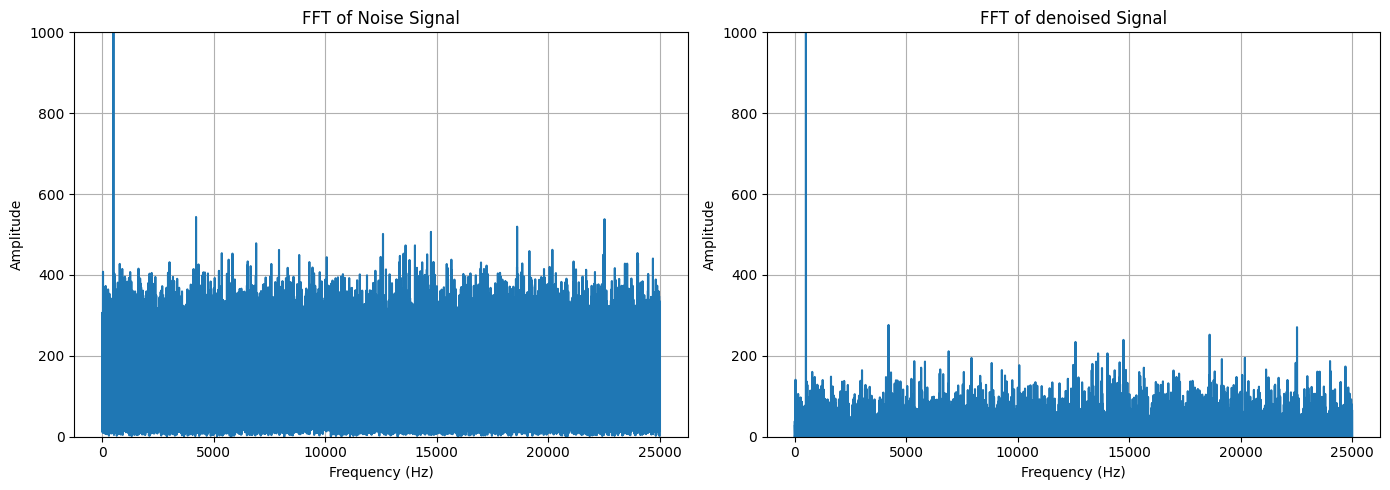

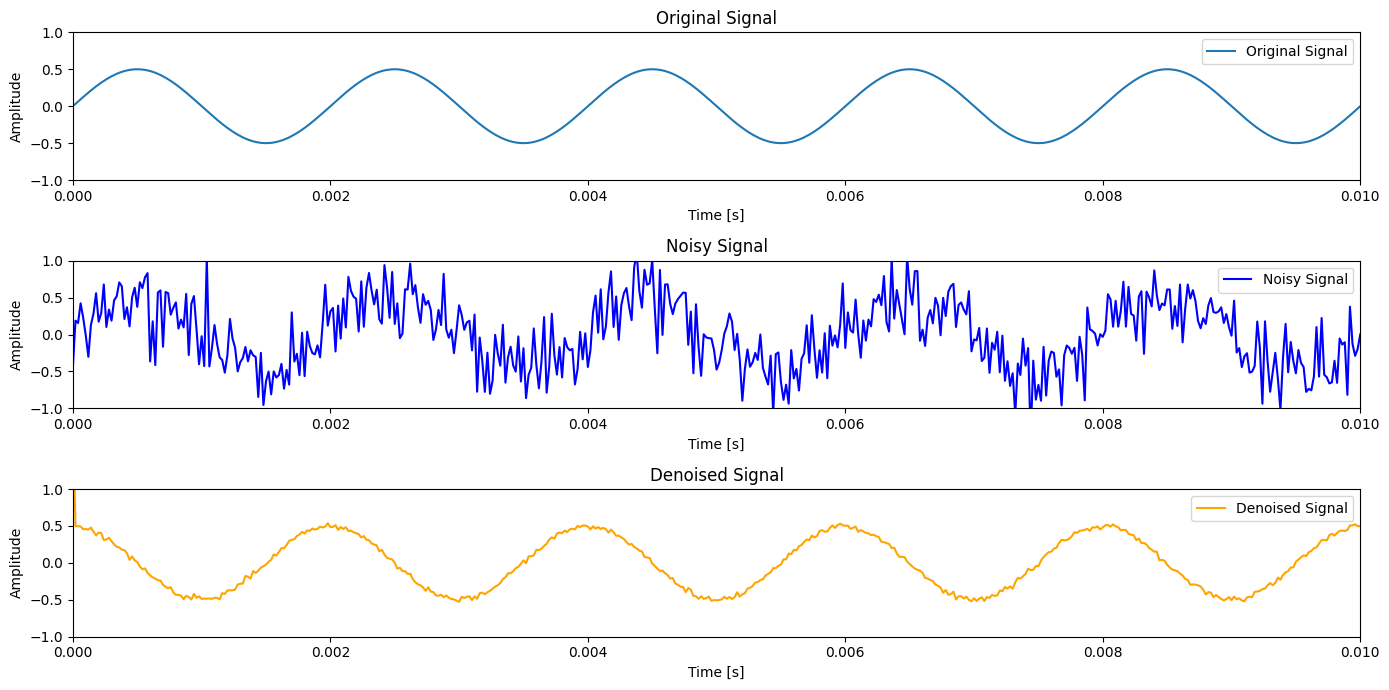

In [2]:
import numpy as np
import soundfile as sf
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

# 正弦波の生成
def generate_sine_wave(frequency, duration, samplerate):
    t = np.linspace(0, duration, int(samplerate * duration), endpoint=False) # サンプリング地点
    signal = 0.5 * np.sin(2 * np.pi * frequency * t) # 振幅0.5の正弦波
    sf.write("original_audio.wav", signal, samplerate) # 正弦波の保存
    return signal

# 正弦波にランダムノイズを追加する
def add_noise(signal, noise_level):
    noise = noise_level * np.random.normal(size=signal.shape) # ノイズの強度 × 正規分布に従う乱数の生成
    noisy_signal = signal + noise # 正弦波とノイズの重ね合わせ
    sf.write("noise_audio.wav", noisy_signal, samplerate) # ノイズの含んだ正弦波の保存
    return noisy_signal


# ノイズを含んだ正弦波からノイズを除去する
def reduce_noise(noisy_signal, reduction_factor=1.0):
    fft_signal = fft(noisy_signal) # ノイズを含んだ正弦波のフーリエ変換
    fft_signal_abs = np.abs(fft_signal) # ノイズを含んだ正弦波のフーリエ変換の絶対値
    noise_profile = np.mean(fft_signal_abs) # fft_signal_abs(振幅)の平均値
    fft_abs_reduced = np.maximum(0, fft_signal_abs - reduction_factor * noise_profile) # 振幅 - ノイズ除去の強度 × 振幅の平均値 
    denoised_signal = ifft(fft_abs_reduced).real # 逆フーリエ変換し、実数部のみ取得
    sf.write("denoised_audio.wav", denoised_signal, samplerate)
    return denoised_signal

# 正弦波、ノイズを含んだ正弦波、ノイズを除いた正弦波を出力する
def plot_signals(original_signal, noisy_signal, denoised_signal, samplerate):
    time = np.linspace(0, len(original_signal) / samplerate, num=len(original_signal))
    
    plt.figure(figsize=(14, 7))
    
    plt.subplot(3, 1, 1)
    plt.plot(time, original_signal, label='Original Signal')
    plt.title('Original Signal')
    plt.xlabel('Time [s]')
    plt.xlim(0,0.01)
    plt.ylim(-1,1)
    plt.ylabel('Amplitude')
    plt.legend()
    
    plt.subplot(3, 1, 2)
    plt.plot(time, noisy_signal, label='Noisy Signal', color='blue')
    plt.title('Noisy Signal')
    plt.xlabel('Time [s]')
    plt.xlim(0,0.01)
    plt.ylim(-1,1)
    plt.ylabel('Amplitude')
    plt.legend()
    
    plt.subplot(3, 1, 3)
    plt.plot(time, denoised_signal, label='Denoised Signal', color='orange')
    plt.title('Denoised Signal')
    plt.xlabel('Time [s]')
    plt.xlim(0,0.01)
    plt.ylim(-1,1)
    plt.ylabel('Amplitude')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def plot_fft(noisy_signal, reduced_signal):
    fft_signal_noisy = np.fft.fft(noisy_signal)
    fft_signal_abs_noisy = np.abs(fft_signal_noisy)
    freqs_noisy = np.fft.fftfreq(len(noisy_signal), 1/samplerate)  # 周波数軸を作成

    fft_signal_reduced = np.fft.fft(reduced_signal)
    fft_signal_abs_reduced = np.abs(fft_signal_reduced)
    freqs_reduced = np.fft.fftfreq(len(reduced_signal), 1/samplerate)  # 周波数軸を作成

    plt.figure(figsize=(14, 5))

    # ノイズを含んだ信号のFFTプロット
    plt.subplot(1, 2, 1)
    plt.plot(freqs_noisy[:len(freqs_noisy)//2], fft_signal_abs_noisy[:len(freqs_noisy)//2]) # ナイキスト周波数以上を無視する
    plt.title('FFT of Noise Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.ylim(0,1000)
    plt.grid(True)

    # ノイズを減少させた後の信号のFFTプロット
    plt.subplot(1, 2, 2)
    plt.plot(freqs_reduced[:len(freqs_reduced)//2], fft_signal_abs_reduced[:len(freqs_reduced)//2]) # ナイキスト周波数以上を無視する
    plt.title('FFT of denoised Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.ylim(0,1000)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def main(frequency, duration, samplerate, noise_level, reduction_factor):
    sine_wave = generate_sine_wave(frequency, duration, samplerate)
    
    noisy_signal = add_noise(sine_wave, noise_level)
    
    denoised_signal = reduce_noise(noisy_signal, reduction_factor)

    plot_fft(noisy_signal, denoised_signal)
    
    plot_signals(sine_wave, noisy_signal, denoised_signal, samplerate)

# Parameters
"""
frequency : 周波数(Hz)
duration : オーディオの持続時間(s)
samplerate : サンプリング周波数(Hz)
noise_level : ノイズ強度
reduction_factor : ノイズ除去強度

"""
frequency = 500  
duration = 5  
samplerate = 50000 
noise_level = 0.3 
reduction_factor = 2.0 

main(frequency, duration, samplerate, noise_level, reduction_factor)
